/home/liujun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


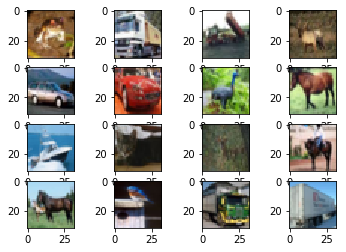

781

In [4]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.datasets import cifar10
def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
show_imgs(x_train[:16])
%matplotlib inline


In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pickle 
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    if epoch >125:
        lrate =0.0001
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
iterations=391
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('selu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
hist=model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=iterations,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

#save to disk
model_json = model.to_json()
with open('model2.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model2.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=2)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

res={"history" : hist.history, "scores" : scores}
pickle_out = open("6_layer_selu_200epoch.pickle","wb")
pickle.dump(res, pickle_out)
pickle_out.close()




Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

UnknownError: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[{{node loss/add_5}}]]

/home/liujun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  # Remove the CWD from sys.path while we load stuff.


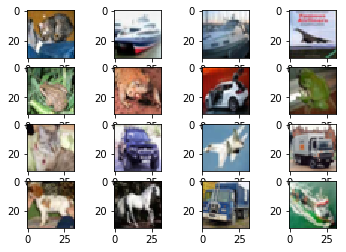

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']


In [11]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pickle
from keras.models import model_from_json

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model2.h5')
 
labels =  ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
 
indices = np.argmax(model.predict(x_test[:16]),1)
print ([labels[x] for x in indices])


In [8]:
import pickle
pickle_in = open("6_layer_selu_200epoch.pickle","rb")
res = pickle.load(pickle_in)
res["history"].keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])

[0.4769,
 0.6402,
 0.6873,
 0.7212,
 0.7354,
 0.7432,
 0.7514,
 0.7845,
 0.7738,
 0.7796,
 0.7873,
 0.7995,
 0.7975,
 0.8118,
 0.8254,
 0.8154,
 0.7778,
 0.8341,
 0.7947,
 0.8218,
 0.8294,
 0.8336,
 0.8285,
 0.8363,
 0.8343,
 0.8414,
 0.8418,
 0.845,
 0.83,
 0.8443,
 0.8393,
 0.8268,
 0.8403,
 0.8342,
 0.8416,
 0.835,
 0.8341,
 0.8452,
 0.843,
 0.8505,
 0.8546,
 0.8295,
 0.8446,
 0.8327,
 0.8429,
 0.8416,
 0.8448,
 0.8568,
 0.8397,
 0.8544,
 0.862,
 0.8478,
 0.8174,
 0.8595,
 0.851,
 0.8605,
 0.8412,
 0.8435,
 0.8509,
 0.8492,
 0.856,
 0.8522,
 0.8676,
 0.8489,
 0.8293,
 0.8475,
 0.8646,
 0.8498,
 0.8456,
 0.8355,
 0.8461,
 0.8531,
 0.8432,
 0.8589,
 0.869,
 0.8617,
 0.8633,
 0.8664,
 0.8669,
 0.8791,
 0.8763,
 0.8821,
 0.8781,
 0.8813,
 0.8752,
 0.8721,
 0.8692,
 0.8772,
 0.8713,
 0.8796,
 0.8793,
 0.8865,
 0.8761,
 0.8741,
 0.8743,
 0.881,
 0.8787,
 0.8775,
 0.8815,
 0.8816,
 0.8767,
 0.8775,
 0.8803,
 0.8836,
 0.888,
 0.8804,
 0.8834,
 0.8818,
 0.8772,
 0.8794,
 0.8796,
 0.8741,
 0.

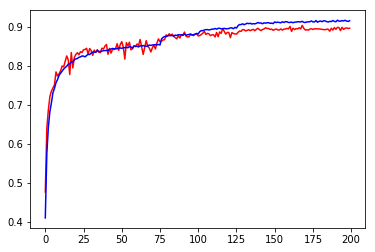

In [10]:
import numpy as np
x=np.arange(200)
pyplot.plot(x,res["history"]['val_acc'], 'r', x, res["history"]['acc'], 'b')
res["history"]['val_acc']

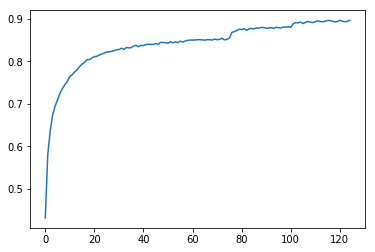

In [13]:
pyplot.plot(res["history"]['acc'])